In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import random
import re
import textwrap
import string
import warnings
warnings.filterwarnings('ignore')
import csv
import seaborn as sbn
%matplotlib inline
from sklearn import linear_model
import math
pd.options.display.float_format = '{:.3f}'.format
from sklearn import preprocessing
sns.set_style('white')
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
crime = pd.read_csv('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013_clean.csv')

In [3]:
crime.shape

(351, 14)

In [4]:
columns = ['City', 'Population', 'Violent_Crimes', 'Murder_Manslaughter', 'Rape_revdef', 'Rape_olddef', 'Robbery', 'Aggravated_Assault', 'Property_Crime', 
              'Burglary', 'Larceny_Theft', 'Motor_Vehicle_Theft', 'Arson', 'Unnamed']

In [5]:
crime.columns=columns
crime[columns]=crime[columns].replace(',', '', regex=True)
crime.drop(crime.head(4).index, inplace=True)
crime_new=crime.drop(['Rape_revdef', 'Unnamed'], axis=1)
crime_new.head()

,City,Population,Violent_Crimes,Murder_Manslaughter,Rape_olddef,Robbery,Aggravated_Assault,Property_Crime,Burglary,Larceny_Theft,Motor_Vehicle_Theft,Arson
4,Albion Village,6388,23,0.000,3,4,16,223,53,165,5,nan
5,Alfred Village,4089,5,0.000,0,3,2,46,10,36,0,nan
6,Allegany Village,1781,3,0.000,0,0,3,10,0,10,0,0.000
7,Amherst Town,118296,107,1.000,7,31,68,2118,204,1882,32,3.000
8,Amityville Village,9519,9,0.000,2,4,3,210,16,188,6,1.000


In [6]:
crime_new.dropna()

,City,Population,Violent_Crimes,Murder_Manslaughter,Rape_olddef,Robbery,Aggravated_Assault,Property_Crime,Burglary,Larceny_Theft,Motor_Vehicle_Theft,Arson
6,Allegany Village,1781,3,0.000,0,0,3,10,0,10,0,0.000
7,Amherst Town,118296,107,1.000,7,31,68,2118,204,1882,32,3.000
8,Amityville Village,9519,9,0.000,2,4,3,210,16,188,6,1.000
9,Amsterdam,18182,30,0.000,0,12,18,405,99,291,15,0.000
10,Arcade Village,2053,0,0.000,0,0,0,39,3,35,1,0.000
11,Ardsley Village,4523,5,0.000,0,3,2,33,4,28,1,0.000
12,Asharoken Village,658,0,0.000,0,0,0,2,0,2,0,0.000
13,Attica Village,2522,2,0.000,0,0,2,5,0,4,1,0.000
16,Baldwinsville Village,7473,5,0.000,0,1,4,88,10,77,1,0.000
17,Ballston Spa Village,5418,8,0.000,0,3,5,94,16,78,0,1.000


In [7]:
#Convert to numeric
crime_new[['Population','Violent_Crimes','Murder_Manslaughter','Rape_olddef','Robbery','Aggravated_Assault','Property_Crime','Burglary','Larceny_Theft','Motor_Vehicle_Theft','Arson']] = crime_new[['Population','Violent_Crimes','Murder_Manslaughter','Rape_olddef','Robbery','Aggravated_Assault','Property_Crime','Burglary','Larceny_Theft','Motor_Vehicle_Theft','Arson']].apply(pd.to_numeric, errors='coerce')

In [8]:
crime_new.dtypes

City                    object
Population             float64
Violent_Crimes         float64
Murder_Manslaughter    float64
Rape_olddef            float64
Robbery                float64
Aggravated_Assault     float64
Property_Crime         float64
Burglary               float64
Larceny_Theft          float64
Motor_Vehicle_Theft    float64
Arson                  float64
dtype: object

In [9]:
crime_new.describe()

,Population,Violent_Crimes,Murder_Manslaughter,Rape_olddef,Robbery,Aggravated_Assault,Property_Crime,Burglary,Larceny_Theft,Motor_Vehicle_Theft,Arson
count,344.000,344.000,344.000,344.000,344.000,344.000,344.000,344.000,344.000,344.000,184.000
mean,40197.256,201.622,1.561,5.846,73.090,121.125,789.782,119.009,634.866,35.907,1.902
std,452629.387,2831.396,18.406,60.760,1036.971,1715.876,7701.859,929.724,6381.134,405.715,10.778
min,526.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,3030.000,2.000,0.000,0.000,0.000,1.000,41.000,6.000,31.000,0.000,0.000
50%,7345.500,6.000,0.000,0.000,1.000,4.500,113.500,18.000,94.500,2.000,0.000
75%,18427.500,22.000,0.000,2.000,5.000,14.000,341.000,51.250,287.250,7.000,1.000
max,8396126.000,52384.000,335.000,1112.000,19170.000,31767.000,141971.000,16606.000,117931.000,7434.000,132.000


In [10]:
crime_new.corr()

,Population,Violent_Crimes,Murder_Manslaughter,Rape_olddef,Robbery,Aggravated_Assault,Property_Crime,Burglary,Larceny_Theft,Motor_Vehicle_Theft,Arson
Population,1.000,0.999,0.987,0.991,0.998,0.999,0.996,0.971,0.998,0.992,0.702
Violent_Crimes,0.999,1.000,0.992,0.995,1.000,1.000,0.998,0.978,0.999,0.996,0.918
Murder_Manslaughter,0.987,0.992,1.000,0.998,0.993,0.991,0.995,0.994,0.993,0.998,0.963
Rape_olddef,0.991,0.995,0.998,1.000,0.996,0.994,0.998,0.993,0.996,0.999,0.926
Robbery,0.998,1.000,0.993,0.996,1.000,1.000,0.998,0.980,0.999,0.997,0.932
Aggravated_Assault,0.999,1.000,0.991,0.994,1.000,1.000,0.998,0.977,0.999,0.995,0.888
Property_Crime,0.996,0.998,0.995,0.998,0.998,0.998,1.000,0.987,1.000,0.998,0.921
Burglary,0.971,0.978,0.994,0.993,0.980,0.977,0.987,1.000,0.983,0.992,0.952
Larceny_Theft,0.998,0.999,0.993,0.996,0.999,0.999,1.000,0.983,1.000,0.997,0.894
Motor_Vehicle_Theft,0.992,0.996,0.998,0.999,0.997,0.995,0.998,0.992,0.997,1.000,0.935


In [11]:
crime_update = pd.concat([crime_new.Population, crime_new.Violent_Crimes, crime_new.Murder_Manslaughter, crime_new.Rape_olddef, crime_new.Robbery,
                   crime_new.Aggravated_Assault, crime_new.Property_Crime, crime_new.Burglary, crime_new.Larceny_Theft, crime_new.Motor_Vehicle_Theft, crime_new.Arson], axis=1)

crime_update.corr()

,Population,Violent_Crimes,Murder_Manslaughter,Rape_olddef,Robbery,Aggravated_Assault,Property_Crime,Burglary,Larceny_Theft,Motor_Vehicle_Theft,Arson
Population,1.000,0.999,0.987,0.991,0.998,0.999,0.996,0.971,0.998,0.992,0.702
Violent_Crimes,0.999,1.000,0.992,0.995,1.000,1.000,0.998,0.978,0.999,0.996,0.918
Murder_Manslaughter,0.987,0.992,1.000,0.998,0.993,0.991,0.995,0.994,0.993,0.998,0.963
Rape_olddef,0.991,0.995,0.998,1.000,0.996,0.994,0.998,0.993,0.996,0.999,0.926
Robbery,0.998,1.000,0.993,0.996,1.000,1.000,0.998,0.980,0.999,0.997,0.932
Aggravated_Assault,0.999,1.000,0.991,0.994,1.000,1.000,0.998,0.977,0.999,0.995,0.888
Property_Crime,0.996,0.998,0.995,0.998,0.998,0.998,1.000,0.987,1.000,0.998,0.921
Burglary,0.971,0.978,0.994,0.993,0.980,0.977,0.987,1.000,0.983,0.992,0.952
Larceny_Theft,0.998,0.999,0.993,0.996,0.999,0.999,1.000,0.983,1.000,0.997,0.894
Motor_Vehicle_Theft,0.992,0.996,0.998,0.999,0.997,0.995,0.998,0.992,0.997,1.000,0.935


Text(0.5, 1.05, 'Correlation of Crime')

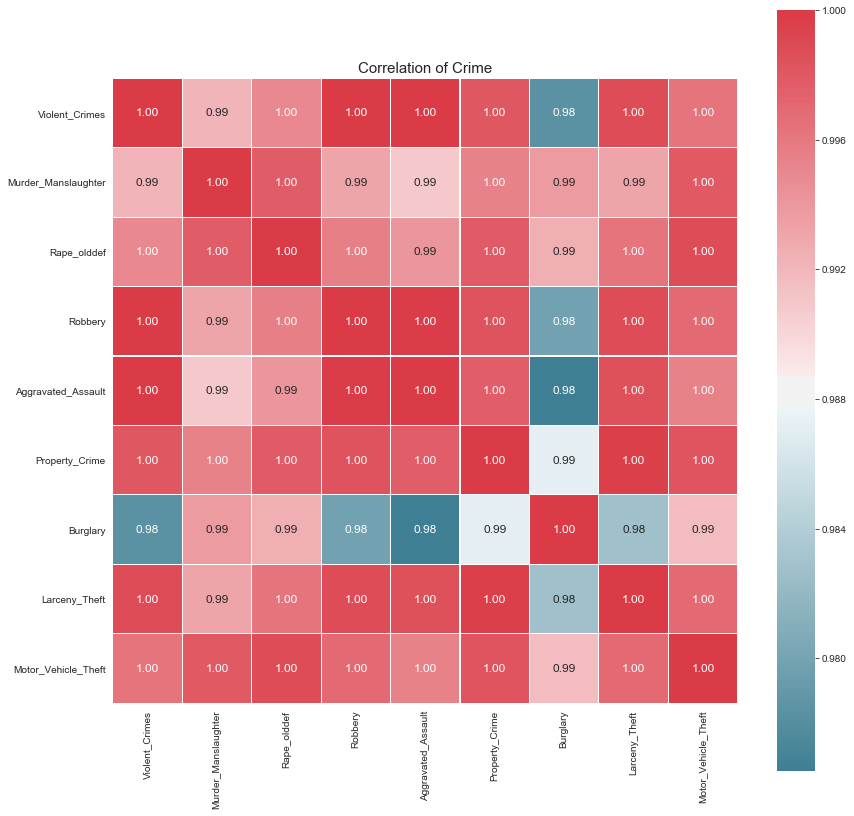

In [12]:
corr = crime_update.iloc[:,1:-1].corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 12},
            cmap = colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation of Crime', y=1.05, size=15)

In [13]:
#Normally, it's nice to see things look so nice and even; however, we are seeing that the correlation is pretty close to perfect which is cause for pause.  Do we have large outliers in the data that we need to look at?
crime_update.describe()

,Population,Violent_Crimes,Murder_Manslaughter,Rape_olddef,Robbery,Aggravated_Assault,Property_Crime,Burglary,Larceny_Theft,Motor_Vehicle_Theft,Arson
count,344.000,344.000,344.000,344.000,344.000,344.000,344.000,344.000,344.000,344.000,184.000
mean,40197.256,201.622,1.561,5.846,73.090,121.125,789.782,119.009,634.866,35.907,1.902
std,452629.387,2831.396,18.406,60.760,1036.971,1715.876,7701.859,929.724,6381.134,405.715,10.778
min,526.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,3030.000,2.000,0.000,0.000,0.000,1.000,41.000,6.000,31.000,0.000,0.000
50%,7345.500,6.000,0.000,0.000,1.000,4.500,113.500,18.000,94.500,2.000,0.000
75%,18427.500,22.000,0.000,2.000,5.000,14.000,341.000,51.250,287.250,7.000,1.000
max,8396126.000,52384.000,335.000,1112.000,19170.000,31767.000,141971.000,16606.000,117931.000,7434.000,132.000


In [14]:
#Time to get into our challenge.  We want to build a regression model to predict property crime.  Let's create some new features.
prop_features = pd.DataFrame()

prop_features['property_crime_rate'] = crime_update.Property_Crime/crime_update.Population
prop_features['population'] = crime_update.Population
prop_features['population_squared'] = crime_update.Population**2
prop_features['murder_rate'] = crime_update.Murder_Manslaughter/crime_update.Population
prop_features['robbery_rate'] = crime_update.Robbery/crime_update.Population
prop_features['assault_rate'] = crime_update.Aggravated_Assault/crime_update.Population
prop_features['burglary_rate'] = crime_update.Burglary/crime_update.Population

prop_features.head(10)

,property_crime_rate,population,population_squared,murder_rate,robbery_rate,assault_rate,burglary_rate
4,0.035,6388.000,40806544.000,0.000,0.001,0.003,0.008
5,0.011,4089.000,16719921.000,0.000,0.001,0.000,0.002
6,0.006,1781.000,3171961.000,0.000,0.000,0.002,0.000
7,0.018,118296.000,13993943616.000,0.000,0.000,0.001,0.002
8,0.022,9519.000,90611361.000,0.000,0.000,0.000,0.002
9,0.022,18182.000,330585124.000,0.000,0.001,0.001,0.005
10,0.019,2053.000,4214809.000,0.000,0.000,0.000,0.001
11,0.007,4523.000,20457529.000,0.000,0.001,0.000,0.001
12,0.003,658.000,432964.000,0.000,0.000,0.000,0.000
13,0.002,2522.000,6360484.000,0.000,0.000,0.001,0.000


In [15]:
crime_update.columns

Index(['Population', 'Violent_Crimes', 'Murder_Manslaughter', 'Rape_olddef',
       'Robbery', 'Aggravated_Assault', 'Property_Crime', 'Burglary',
       'Larceny_Theft', 'Motor_Vehicle_Theft', 'Arson'],
      dtype='object')

In [16]:
crime_update.dropna(axis=0,how='all',inplace=True)
model = crime_update.apply(pd.to_numeric)
model['population_squared']=crime_update['Population']**2
model['population'] = crime_update.Population
model['property_crime'] = crime_update.Property_Crime/crime_update.Population
model['murder']=crime_update['Murder_Manslaughter'].apply(lambda x: 0 if x <= 0 else 1)
model['assault']=crime_update['Aggravated_Assault'].apply(lambda x: 0 if x <= 0 else 1)
model.apply(pd.to_numeric)
model.head()

,Population,Violent_Crimes,Murder_Manslaughter,Rape_olddef,Robbery,Aggravated_Assault,Property_Crime,Burglary,Larceny_Theft,Motor_Vehicle_Theft,Arson,population_squared,population,property_crime,murder,assault
4,6388.000,23.000,0.000,3.000,4.000,16.000,223.000,53.000,165.000,5.000,nan,40806544.000,6388.000,0.035,0,1
5,4089.000,5.000,0.000,0.000,3.000,2.000,46.000,10.000,36.000,0.000,nan,16719921.000,4089.000,0.011,0,1
6,1781.000,3.000,0.000,0.000,0.000,3.000,10.000,0.000,10.000,0.000,0.000,3171961.000,1781.000,0.006,0,1
7,118296.000,107.000,1.000,7.000,31.000,68.000,2118.000,204.000,1882.000,32.000,3.000,13993943616.000,118296.000,0.018,1,1
8,9519.000,9.000,0.000,2.000,4.000,3.000,210.000,16.000,188.000,6.000,1.000,90611361.000,9519.000,0.022,0,1


In [17]:
model.dropna(axis=0,how='all',inplace=True)
Y = model['property_crime']
X = model[['population','population_squared','murder','assault']]

In [18]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-Squared:')
print(regr.score(X, Y))


Coefficients: 
 [ 3.47781295e-08 -4.25416449e-15  4.50809358e-03  1.02479229e-02]

Intercept: 
 0.010061318778890157

R-Squared:
0.11660189222202445


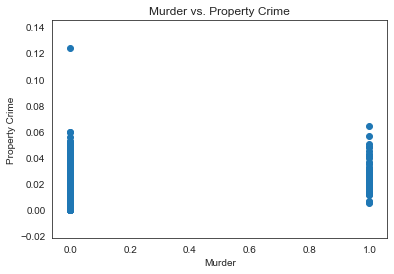

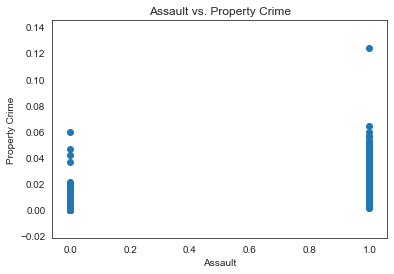

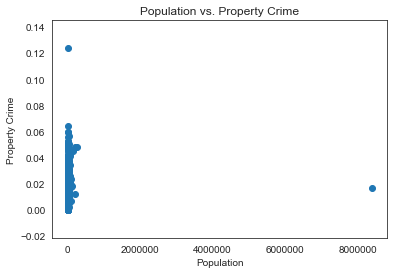

In [19]:
#Linear Relationships.  What happens when we check our linear relationships?
plt.scatter(y=model['property_crime'], x=model['murder'])
plt.ylabel('Property Crime')
plt.xlabel('Murder')
plt.title('Murder vs. Property Crime')
plt.show()

plt.scatter(y=model['property_crime'], x=model['assault'])
plt.ylabel('Property Crime')
plt.xlabel('Assault')
plt.title('Assault vs. Property Crime')
plt.show()

plt.scatter(y=model['property_crime'], x=model['Population'])
plt.ylabel('Property Crime')
plt.xlabel('Population')
plt.title('Population vs. Property Crime')
plt.show()


In [20]:
#Interesting, the property crime rate seems to be linearily related to the different types of crime

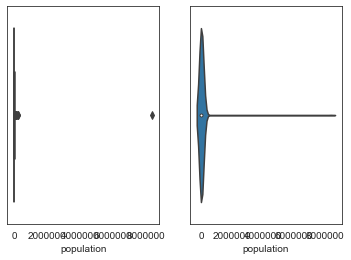

In [21]:
plt.subplot(121)
population = sns.boxplot(model['population'])
plt.subplot(122)
population = sns.violinplot(model['population'])

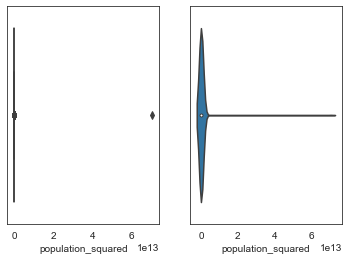

In [22]:
plt.subplot(121)
population_squared = sns.boxplot(model['population_squared'])
plt.subplot(122)
population = sns.violinplot(model['population_squared'])

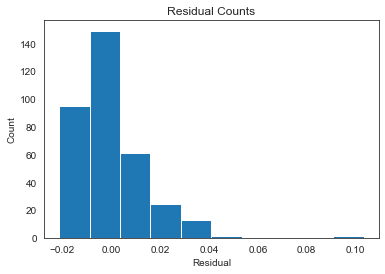

In [23]:
#Multivariate Normality
predicted = regr.predict(X).ravel()
actual = Y
residual = actual - predicted

plt.hist(residual)
plt.title('Residual Counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

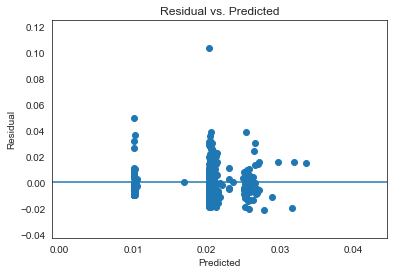

In [24]:
#Homoscedasticity
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

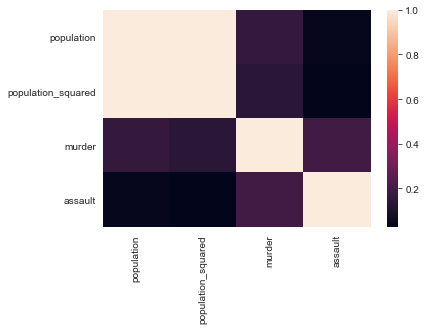

In [25]:
#Low Multi collinearity
correlation_matrix = X.corr()
multicollinearity = sns.heatmap(correlation_matrix)
ticks = plt.xticks(rotation=90)

In [26]:
#Let's create some new features to use with our df 'model'
model[['robbery','burglary','motor_vehicle_theft']]=crime_update[['Robbery','Burglary','Motor_Vehicle_Theft']]
model.drop(labels=['population_squared'], axis=1, inplace=True)

In [27]:
model.dropna(axis=0,how='all',inplace=True)
model = model.apply(pd.to_numeric)
model['robbery']=crime_update['Robbery'].apply(lambda x: 0 if x <= 0 else 1)
model['burglary']=crime_update['Burglary'].apply(lambda x: 0 if x <= 0 else 1)
model['motor_vehicle_theft']=crime_update['Motor_Vehicle_Theft'].apply(lambda x: 0 if x <= 0 else 1)
model.apply(pd.to_numeric)
model.head()

,Population,Violent_Crimes,Murder_Manslaughter,Rape_olddef,Robbery,Aggravated_Assault,Property_Crime,Burglary,Larceny_Theft,Motor_Vehicle_Theft,Arson,population,property_crime,murder,assault,robbery,burglary,motor_vehicle_theft
4,6388.000,23.000,0.000,3.000,4.000,16.000,223.000,53.000,165.000,5.000,nan,6388.000,0.035,0,1,1,1,1
5,4089.000,5.000,0.000,0.000,3.000,2.000,46.000,10.000,36.000,0.000,nan,4089.000,0.011,0,1,1,1,0
6,1781.000,3.000,0.000,0.000,0.000,3.000,10.000,0.000,10.000,0.000,0.000,1781.000,0.006,0,1,0,0,0
7,118296.000,107.000,1.000,7.000,31.000,68.000,2118.000,204.000,1882.000,32.000,3.000,118296.000,0.018,1,1,1,1,1
8,9519.000,9.000,0.000,2.000,4.000,3.000,210.000,16.000,188.000,6.000,1.000,9519.000,0.022,0,1,1,1,1


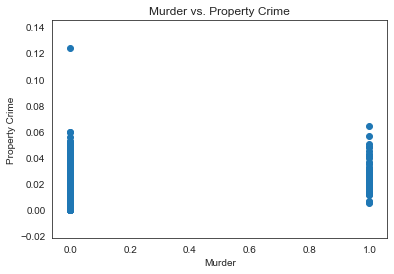

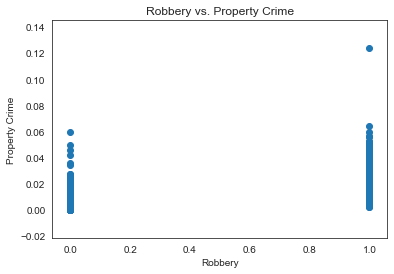

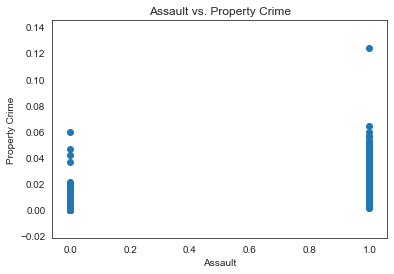

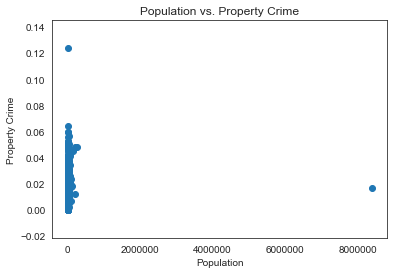

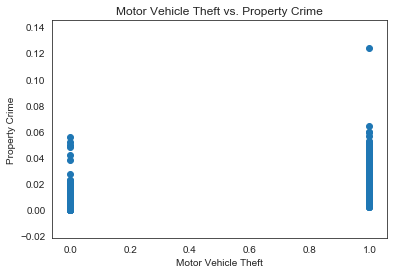

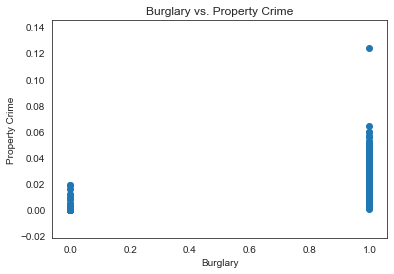

In [28]:
#Linear Relationships.  We will now check our relationships again since we have created new features
plt.scatter(y=model['property_crime'], x=model['murder'])
plt.ylabel('Property Crime')
plt.xlabel('Murder')
plt.title('Murder vs. Property Crime')
plt.show()

plt.scatter(y=model['property_crime'], x=model['robbery'])
plt.ylabel('Property Crime')
plt.xlabel('Robbery')
plt.title('Robbery vs. Property Crime')
plt.show()

plt.scatter(y=model['property_crime'], x=model['assault'])
plt.ylabel('Property Crime')
plt.xlabel('Assault')
plt.title('Assault vs. Property Crime')
plt.show()

plt.scatter(y=model['property_crime'], x=model['Population'])
plt.ylabel('Property Crime')
plt.xlabel('Population')
plt.title('Population vs. Property Crime')
plt.show()

plt.scatter(y=model['property_crime'], x=model['motor_vehicle_theft'])
plt.ylabel('Property Crime')
plt.xlabel('Motor Vehicle Theft')
plt.title('Motor Vehicle Theft vs. Property Crime')
plt.show()

plt.scatter(y=model['property_crime'], x=model['burglary'])
plt.ylabel('Property Crime')
plt.xlabel('Burglary')
plt.title('Burglary vs. Property Crime')
plt.show()

In [29]:
#New Multivariate Normality
#Y= model['property_crime']
#X = model[['murder','robbery','assault','Population','motor_vehicle_theft', 'burglary']]

In [30]:
#predicted = regr.predict(X).ravel()
#actual = Y
#residual = actual - predicted

#plt.hist(residual)
#plt.title('Residual Counts')
#plt.xlabel('Residual')
#plt.ylabel('Count')
#plt.show()

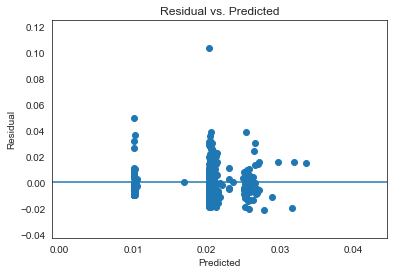

In [31]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

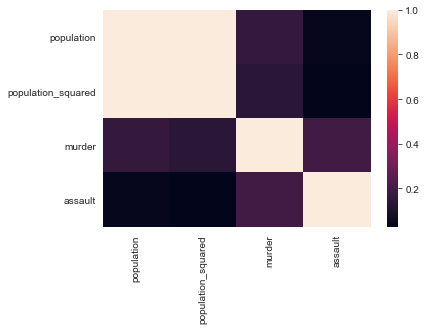

In [32]:
correlation_matrix = X.corr()
multicollinearity = sns.heatmap(correlation_matrix)
ticks = plt.xticks(rotation=90)

In [33]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-Squared:')
print(regr.score(X, Y))


Coefficients: 
 [ 3.47781295e-08 -4.25416449e-15  4.50809358e-03  1.02479229e-02]

Intercept: 
 0.010061318778890157

R-Squared:
0.11660189222202445
